In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                  'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

KeyboardInterrupt: 

In [ ]:
df.to_csv('data/data.csv', index=None, sep=',')

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/data.csv')

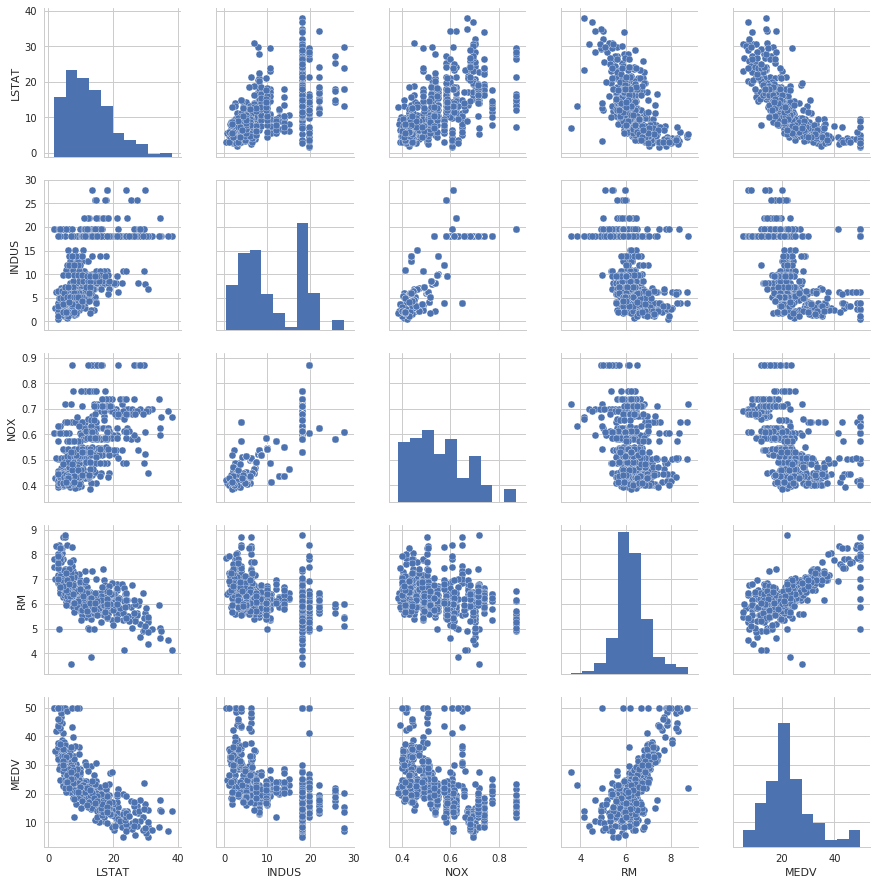

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

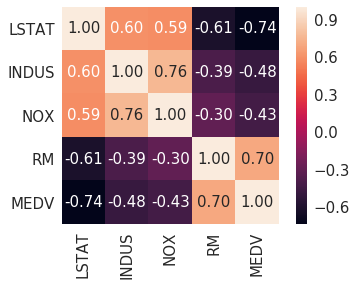

In [6]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

In [7]:
np.mat(df[['MEDV']].values).shape

(506, 1)

In [8]:
class LinearRegressionGD():
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros((1+X.shape[1], 1))
        self.cost_ = []
        for i in range(self.n_iter):
            predict = self.predict(X)
            error = y - predict
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            cost = (error ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def predict(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

In [28]:
X = df[['RM']].values # 列向量
y = df[['MEDV']].values # 列向量
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y) # y也要标准化
lr = LinearRegressionGD()
lr.fit(X_std, y_std)
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

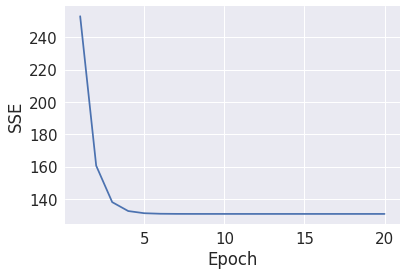

In [10]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

Text(0,0.5,"Price in $1000's [MEDV](sandardized)")

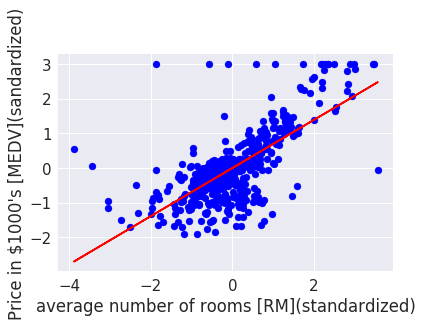

In [11]:
predict_y = lr.predict(X_std)
plt.scatter(X_std, y_std, c='blue')
plt.plot(X_std, predict_y, c='red')
plt.xlabel('average number of rooms [RM](standardized)')
plt.ylabel('Price in $1000\'s [MEDV](sandardized)')

In [12]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
price= sc_y.inverse_transform(price_std)
print(price)

[[10.83993289]]


In [13]:
# 使用sklearn实现线性回归模型
from sklearn.linear_model import LinearRegression
slr = LinearRegression(normalize=False)
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print('Slope: %.3f' % slr.coef_[0]) # 斜率
print('Intercept: %.3f' % slr.intercept_) # 截距

Slope: 9.102
Intercept: -34.671


In [15]:
# 使用ransac拟合高鲁棒性回归模型
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X,y)

/home/liuchao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/linear_model/ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x7eff016c4840>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

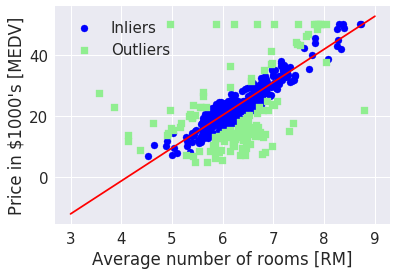

In [16]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis]) #将一维转换为二维
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [17]:
print('Slope: %.3f' % ransac.estimator_.coef_[0]) # 斜率
print('Intercept: %.3f' % ransac.estimator_.intercept_) # 截距

Slope: 10.735
Intercept: -44.089


In [26]:
# 回归模型评估
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values # 506行13列
print(X.shape)
y = df.iloc[:,-1].values # 1行506列
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
X

(506, 13)
(506,)


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

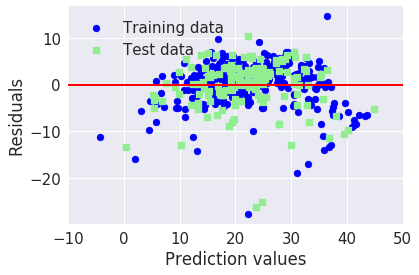

In [19]:
# 绘制残差图
plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Prediction values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [20]:
# 均方误差
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('train mse: %.3f, test mse: %.3f' %(train_mse, test_mse))

train mse: 19.958, test mse: 27.196


In [21]:
# 决定系数
from sklearn.metrics import r2_score
train_rsc = r2_score(y_train, y_train_pred)
test_rsc = r2_score(y_test, y_test_pred)
print('train rsc: %.3f, test rcs: %.3f' %(train_rsc, test_rsc))

train rsc: 0.765, test rcs: 0.673


In [22]:
# 拟合多项式
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

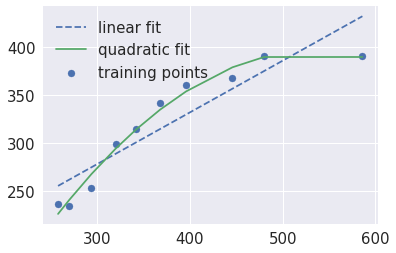

In [24]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
plt.scatter(X, y, label='training points')
plt.plot(X, lr.predict(X), linestyle='--', label='linear fit')
plt.plot(X, pr.predict(X_quad), label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

Text(0,0.5,"Price in $1000's [MEDV](sandardized)")

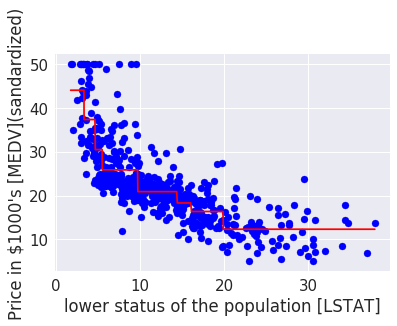

In [35]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort() # 排序后的index
predict_y = tree.predict(X[sort_idx])
plt.scatter(X, y, c='blue')
plt.plot(X[sort_idx], predict_y, c='red')
plt.xlabel('lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV](sandardized)')

In [36]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f; test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('r2 train: %.3f; test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 1.642; test: 11.052
r2 train: 0.979; test: 0.878
